In [1]:
import pandas as pd
import json
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('process_csv_stage_3.csv')
df

,old_index,preprocessed_text,topic_lda,priority
0,1,good morning name appreciate could help put st...,0,3
1,2,upgraded card tell agent upgrade anniversary d...,3,1
2,10,chase card report however fraudulent applicati...,6,2
3,11,try book ticket come across offer apply toward...,3,3
4,14,grand son give check deposit chase account fun...,4,3
...,...,...,...,...
21067,78303,chase card customer well decade offer multiple...,3,3
21068,78309,wednesday call chas visa credit card provider ...,8,1
21069,78310,familiar pay understand great risk provide con...,2,2
21070,78311,flawless credit chase credit card chase freedo...,7,3


# Data Partition

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['preprocessed_text']

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=0.05,
    max_features=10000
)
X = vectorizer.fit_transform(corpus)
X.shape

(21072, 293)

In [4]:
vectorizer.get_feature_names_out()

array(['able', 'accept', 'access', 'account', 'act', 'action', 'activity',
       'add', 'additional', 'address', 'advise', 'agency', 'ago', 'agree',
       'allow', 'already', 'also', 'amount', 'another', 'answer',
       'anything', 'application', 'apply', 'approve', 'around', 'ask',
       'attach', 'attempt', 'authorize', 'available', 'back', 'balance',
       'bank', 'banking', 'base', 'begin', 'believe', 'bill', 'branch',
       'bureau', 'business', 'call', 'cancel', 'card', 'case', 'cash',
       'cause', 'cfp', 'change', 'charge', 'check', 'claim', 'clear',
       'close', 'come', 'company', 'complaint', 'complete', 'concern',
       'confirm', 'consumer', 'contact', 'continue', 'copy', 'correct',
       'could', 'credit', 'current', 'customer', 'date', 'day', 'debit',
       'debt', 'decide', 'deny', 'department', 'deposit', 'different',
       'dispute', 'document', 'documentation', 'dollar', 'due', 'either',
       'email', 'end', 'error', 'even', 'ever', 'every', 'everythi

In [5]:
# save vectorizer
import os
from pickle import dump
with open(os.path.join(os.getcwd(),'ml_models',"vectorizer_005_080_10000.pkl"), "wb") as f:
    dump(vectorizer, f, protocol=5)

In [6]:
y1 = df['topic_lda']
y2 = df['priority']

In [7]:
# split into training set (test set?) and validation set

# train = 80, test = 20
# random_seed = 42
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [8]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(16857, 293)
(4215, 293)
(16857,)
(4215,)
(16857, 293)
(4215, 293)
(16857,)
(4215,)


# Model Building

## Ticket Category 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42).fit(X1_train, y1_train)
rf1.score(X1_test, y1_test)

0.7167259786476868

In [10]:
rf1_preds = rf1.predict(X1_test)
rf1_preds

array([0, 5, 1, ..., 3, 6, 0], dtype=int64)

## Ticket Priority

In [11]:
rf2 = RandomForestClassifier(random_state=42).fit(X2_train, y2_train)
rf2.score(X2_test, y2_test)

0.639620403321471

In [12]:
rf2_preds = rf2.predict(X2_test)
rf2_preds

array([3, 1, 1, ..., 3, 3, 3], dtype=int64)

# Evaluation

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Ticket Category

================ Ticket Category =================
Accuracy:  0.7167259786476868
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       857
           1       0.71      0.84      0.77       463
           2       0.95      0.18      0.31       200
           3       0.71      0.76      0.73       393
           4       0.71      0.83      0.77       628
           5       0.77      0.45      0.57       281
           6       0.78      0.81      0.80       508
           7       0.74      0.77      0.76       474
           8       0.74      0.59      0.65       411

    accuracy                           0.72      4215
   macro avg       0.75      0.66      0.67      4215
weighted avg       0.73      0.72      0.71      4215



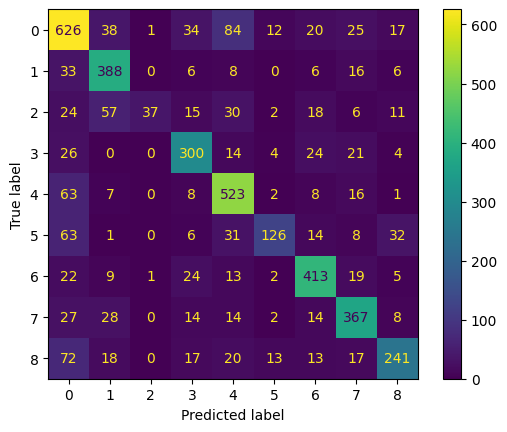

In [14]:
print(f'{" Ticket Category ":=^50}')
print("Accuracy: ", accuracy_score(y_true=y1_test, y_pred=rf1_preds))
print("Classification Report:\n",classification_report(y1_test,rf1_preds))

cm = confusion_matrix(y_true=y1_test, y_pred=rf1_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i for i in range(9)])
cm_display.plot()
plt.show()

## Ticket Priority

================ Ticket Priority =================
Accuracy:  0.639620403321471
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.39      0.49       802
           2       0.59      0.40      0.47      1282
           3       0.65      0.88      0.75      2131

    accuracy                           0.64      4215
   macro avg       0.63      0.56      0.57      4215
weighted avg       0.63      0.64      0.62      4215



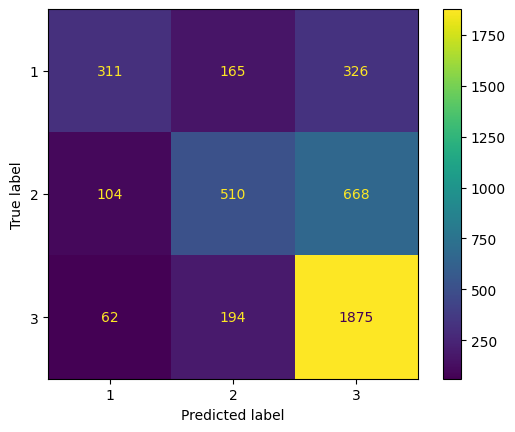

In [15]:
print(f'{" Ticket Priority ":=^50}')
print("Accuracy: ", accuracy_score(y_true=y2_test, y_pred=rf2_preds))
print("Classification Report:\n",classification_report(y2_test, rf2_preds))

cm = confusion_matrix(y_true=y2_test, y_pred=rf2_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i for i in range(1,4)])
cm_display.plot()
plt.show()

# Tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
param_grid = {
    "n_estimators": np.linspace(100,1000, 10).astype(int),
    "min_samples_split": np.linspace(0.01, 0.05, 5),
    "min_samples_leaf": np.linspace(0.005, 0.025, 5),
    "max_depth":[10,20,50],
    "max_leaf_nodes":[5,10,50,100]
}

In [18]:
random_search1 = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_distributions=param_grid, 
    n_iter=10,
    cv=5, 
    n_jobs=-1, 
    verbose=2)
random_search2 = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_distributions=param_grid, 
    n_iter=10,
    cv=5, 
    n_jobs=-1, 
    verbose=2)

## Ticket Category

In [19]:
random_search1.fit(X1_train, y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 50],
                                        'max_leaf_nodes': [5, 10, 50, 100],
                                        'min_samples_leaf': array([0.005, 0.01 , 0.015, 0.02 , 0.025]),
                                        'min_samples_split': array([0.01, 0.02, 0.03, 0.04, 0.05]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   verbose=2)

In [20]:
print("Best hyperparameters:", random_search1.best_params_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 0.02, 'min_samples_leaf': 0.005, 'max_leaf_nodes': 100, 'max_depth': 10}


In [21]:
bestrf1 = random_search1.best_estimator_

In [22]:
bestrf1_preds = bestrf1.predict(X1_test)
print("Best model accuracy:", bestrf1.score(X1_test, y1_test))

Best model accuracy: 0.6270462633451958


## Ticket Priority

In [23]:
random_search2.fit(X2_train, y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 50],
                                        'max_leaf_nodes': [5, 10, 50, 100],
                                        'min_samples_leaf': array([0.005, 0.01 , 0.015, 0.02 , 0.025]),
                                        'min_samples_split': array([0.01, 0.02, 0.03, 0.04, 0.05]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   verbose=2)

In [24]:
print("Best hyperparameters:", random_search2.best_params_)

Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 0.05, 'min_samples_leaf': 0.01, 'max_leaf_nodes': 50, 'max_depth': 50}


In [25]:
bestrf2 = random_search2.best_estimator_

In [26]:
bestrf2_preds = bestrf2.predict(X2_test)
print("Best model accuracy:", bestrf2.score(X2_test, y2_test))

Best model accuracy: 0.5556346381969158


# Evaluation After Tuning

## Ticket Category

================ Ticket Category =================
Accuracy:  0.6270462633451958
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.71      0.59       857
           1       0.66      0.81      0.73       463
           2       0.00      0.00      0.00       200
           3       0.71      0.59      0.65       393
           4       0.63      0.82      0.71       628
           5       0.95      0.07      0.13       281
           6       0.70      0.75      0.72       508
           7       0.72      0.67      0.69       474
           8       0.66      0.47      0.55       411

    accuracy                           0.63      4215
   macro avg       0.62      0.54      0.53      4215
weighted avg       0.63      0.63      0.59      4215



C:\Users\dxlee\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dxlee\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dxlee\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


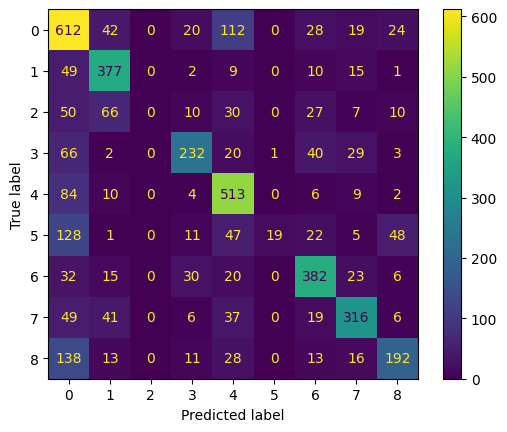

In [27]:
print(f'{" Ticket Category ":=^50}')
print("Accuracy: ", accuracy_score(y_true=y1_test, y_pred=bestrf1_preds))
print("Classification Report:\n",classification_report(y1_test,bestrf1_preds))

cm = confusion_matrix(y_true=y1_test, y_pred=bestrf1_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i for i in range(9)])
cm_display.plot()
plt.show()

## Ticket Priority

================ Ticket Priority =================
Accuracy:  0.5556346381969158
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.10      0.18       802
           2       0.59      0.18      0.28      1282
           3       0.55      0.95      0.69      2131

    accuracy                           0.56      4215
   macro avg       0.63      0.41      0.38      4215
weighted avg       0.60      0.56      0.47      4215



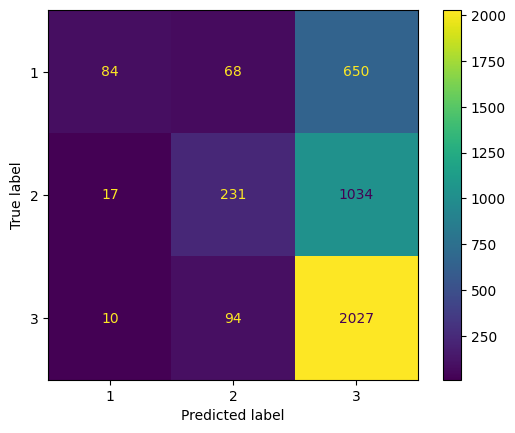

In [28]:
print(f'{" Ticket Priority ":=^50}')
print("Accuracy: ", accuracy_score(y_true=y2_test, y_pred=bestrf2_preds))
print("Classification Report:\n",classification_report(y2_test, bestrf2_preds))

cm = confusion_matrix(y_true=y2_test, y_pred=bestrf2_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i for i in range(1,4)])
cm_display.plot()
plt.show()

# Save tuned model to disk

In [29]:
import os
from pickle import dump
with open(os.path.join(os.getcwd(),'ml_models',"tuned_rf1.pkl"), "wb") as f:
    dump(bestrf1, f, protocol=5)
with open(os.path.join(os.getcwd(),'ml_models',"tuned_rf2.pkl"), "wb") as f:
    dump(bestrf2, f, protocol=5)